In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_AL_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,NaN,0.0177,0.0393,0.1630,0.2028,0.1694,NaN,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	20
float64		column 4	0
float64		column 5	0
float64		column 6	0
float64		column 7	0
float64		column 8	0
float64		column 9	40
float64		column 10	0
float64		column 11	40
float64		column 12	0
float64		column 13	40
float64		column 14	40
float64		column 15	0
float64		column 16	40
float64		column 17	40
float64		column 18	40
float64		column 19	40
float64		column 20	40
float64		column 21	40
float64		column 22	40
float64		column 23	0
float64		column 30	40
float64		column 25	40
float64		column 26	40
float64		column 27	40
float64		column 28	20
float64		column 29	20
float64		column 30	40
float64		column 31	0
float64		column 32	20
float64		column 33	40
float64		column 34	20
float64		column 35	20
float64		column 36	40
float64		column 37	40
float64		column 38	40
float64		column 39	20
float64		column 40	20
float64		column 41	20
float64		column 42	20
float64		column 43	40
float64		column 44	20
float64		column

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,208.000000,208.000000,188.000000,208.000000,208.000000,208.000000,208.000000,208.000000,168.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043309,0.053892,0.075202,0.104570,0.121747,0.134799,0.174057,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038825,0.046528,0.055552,0.059105,0.061788,0.085152,0.114325,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.017700,0.024375,0.038050,0.067025,0.080900,0.080425,0.096025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.033150,0.044050,0.062500,0.092150,0.106950,0.112100,0.153700,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.058825,0.064500,0.100275,0.134125,0.154000,0.169600,0.224375,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

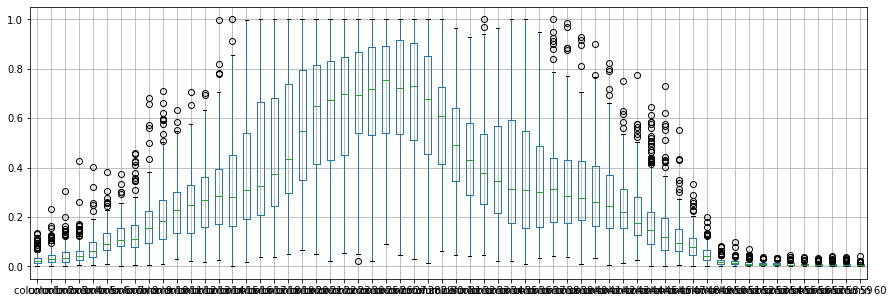

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.029164
column 2       0.038437
column 3       0.043309
column 4       0.053892
column 5       0.075202
column 6       0.104570
column 7       0.121747
column 8       0.134799
column 9       0.174057
column 10      0.208259
column 11      0.233423
column 12      0.250221
column 13      0.278351
column 14      0.303970
column 15      0.320201
column 16      0.386737
column 17      0.426705
column 18      0.459217
column 19      0.504038
column 20      0.566895
column 21      0.616273
column 22      0.632049
column 23      0.646975
column 30      0.671773
column 25      0.678484
column 26      0.697045
column 27      0.701535
column 28      0.691010
column 29      0.640383
column 30.1    0.581673
column 31      0.504475
column 32      0.441296
column 33      0.405418
column 34      0.395435
column 35      0.390435
column 36      0.378953
column 37      0.357607
column 38      0.337406
column 39      0.327794
column 40      0.314252
column 41      0.295777
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.735896,0.570373,0.491438,0.344797,0.238921,0.260815,0.355523,0.362180,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
column 2,0.735896,1.000000,0.777025,0.606684,0.419669,0.332329,0.279040,0.334615,0.337327,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
column 3,0.570373,0.777025,1.000000,0.798868,0.552259,0.335218,0.186914,0.265370,0.328086,0.268611,...,0.229233,0.377363,0.328784,0.364727,0.289582,0.305944,0.370203,0.326737,0.430516,0.417214
column 4,0.491438,0.606684,0.798868,1.000000,0.726943,0.352805,0.246440,0.246742,0.218434,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
column 5,0.344797,0.419669,0.552259,0.726943,1.000000,0.597053,0.335422,0.204006,0.185707,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
column 6,0.238921,0.332329,0.335218,0.352805,0.597053,1.000000,0.702889,0.471683,0.435865,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
column 7,0.260815,0.279040,0.186914,0.246440,0.335422,0.702889,1.000000,0.675774,0.511332,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
column 8,0.355523,0.334615,0.265370,0.246742,0.204006,0.471683,0.675774,1.000000,0.782503,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
column 9,0.362180,0.337327,0.328086,0.218434,0.185707,0.435865,0.511332,0.782503,1.000000,0.876620,...,0.195405,0.224118,0.046675,0.158391,0.144183,0.270662,0.281551,0.259141,0.142454,0.092634
column 10,0.318276,0.270782,0.268611,0.237769,0.183219,0.288621,0.425448,0.652525,0.876620,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+14,60+14+14,60+14+14+14,60+14+14,60+14,60], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 16.382662479694073
Epoch: 1 , loss: 16.18982799236591
Epoch: 2 , loss: 16.085517443143406
Epoch: 3 , loss: 15.974100993229793
Epoch: 4 , loss: 15.87351732987624
Epoch: 5 , loss: 15.8456601362962
Epoch: 6 , loss: 15.770244084871733
Epoch: 7 , loss: 15.729152312645546
Epoch: 8 , loss: 15.614855106060322
Epoch: 9 , loss: 15.522657321049618
Epoch: 10 , loss: 15.431749197152945
Epoch: 11 , loss: 15.237045581524189
Epoch: 12 , loss: 15.112271235539364
Epoch: 13 , loss: 14.9372128706712
Epoch: 14 , loss: 14.602222515986515
Epoch: 15 , loss: 14.236230630141039
Epoch: 16 , loss: 13.809322430537296
Epoch: 17 , loss: 13.009024179898775
Epoch: 18 , loss: 12.198376142061674
Epoch: 19 , loss: 11.132073695843037
Epoch: 20 , loss: 9.988220581641563
Epoch: 21 , loss: 9.300951810983511
Epoch: 22 , loss: 8.865940497471737
Epoch: 23 , loss: 8.683564369495098
Epoch: 24 , loss: 8.44097746335543
Epoch: 25 , loss: 8.272446375

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.0664
column 2       0.0575
column 3       0.0842
column 4       0.0372
column 5       0.0458
column 6       0.0771
column 7       0.0771
column 8       0.1130
column 9       0.2353
column 10      0.1838
column 11      0.2869
column 12      0.4129
column 13      0.3647
column 14      0.1984
column 15      0.2840
column 16      0.4039
column 17      0.5837
column 18      0.6792
column 19      0.6086
column 20      0.4858
column 21      0.3246
column 22      0.2013
column 23      0.2082
column 30      0.1686
column 25      0.2484
column 26      0.2736
column 27      0.2984
column 28      0.4655
column 29      0.6990
column 30.1    0.7474
column 31      0.7956
column 32      0.7981
column 33      0.6715
column 34      0.6942
column 35      0.7440
column 36      0.8169
column 37      0.8912
column 38      1.0000
column 39      0.8753
column 40      0.7061
column 41      0.6803
column 42      0.5898
column 43      0.4618
column 44      0.3639
column 45      0.1492
column 46 

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.0,0.007995,0.0,0.0,0.0,0.0,0.0,-0.138653,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

8.855295139484628

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.19872278763475013

In [19]:
new_df.iloc[66,:]

column 1       0.0265
column 2       0.0440
column 3       0.0137
column 4       0.0084
column 5       0.0305
column 6       0.0438
column 7       0.0341
column 8       0.0780
column 9       0.0844
column 10      0.0779
column 11      0.0327
column 12      0.2060
column 13      0.1908
column 14      0.1065
column 15      0.1457
column 16      0.2232
column 17      0.2070
column 18      0.1105
column 19      0.1078
column 20      0.1165
column 21      0.2224
column 22      0.0689
column 23      0.2060
column 30      0.2384
column 25      0.0904
column 26      0.2278
column 27      0.5872
column 28      0.8457
column 29      0.8467
column 30.1    0.7679
column 31      0.8055
column 32      0.6260
column 33      0.6545
column 34      0.8747
column 35      0.9885
column 36      0.9348
column 37      0.6960
column 38      0.5733
column 39      0.5872
column 40      0.6663
column 41      0.5651
column 42      0.5247
column 43      0.3684
column 44      0.1997
column 45      0.1512
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.042800,0.0207,0.0954,0.0986,0.1539,0.1601,0.310900,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.084300,0.0689,0.1183,0.2583,0.2156,0.3481,0.333700,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.109900,0.1083,0.0974,0.2280,0.2431,0.3771,0.559800,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.062300,0.0205,0.0205,0.0368,0.1098,0.1276,0.059800,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.048100,0.0394,0.0590,0.0649,0.1209,0.2467,0.356400,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.024795,0.0177,0.0393,0.1630,0.2028,0.1694,0.094147,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.029800,0.0564,0.0760,0.0958,0.0990,0.1018,0.103000,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.018000,0.0292,0.0351,0.1171,0.1257,0.1178,0.125800,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.049000,0.0608,0.0167,0.1354,0.1465,0.1123,0.194500,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
imputations[-1].to_excel("Sonar_AL_10(imp).xlsx", index=False, header=False)